In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 0. DecisionBoundary

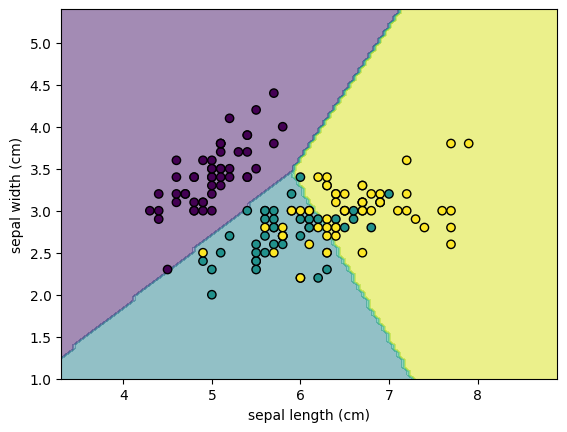

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay


iris = load_iris()
X = iris.data[:, :2]

classifier = LogisticRegression().fit(X, iris.target)

disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

# 1. Классификация через линейную регрессию

In [3]:
def one_hot(labels):
    categories, inverse = np.unique(labels, return_inverse=True)
    one_hot = np.zeros((labels.size, categories.size))
    one_hot[np.arange(labels.size), inverse] = 1
    return one_hot

## Три класса

In [4]:
n_samples = 1000
n_classes = 3
n_features = 2

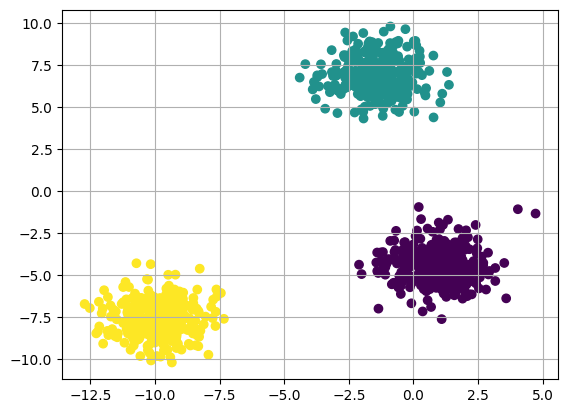

In [5]:
X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=100)
X = np.column_stack((X, np.ones(n_samples)))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

In [6]:
T = one_hot(y)

In [7]:
w = np.linalg.inv(X.T @ X) @ X.T @ T
w.shape

(3, 3)

In [8]:
y_pred = X @ w
y_pred = y_pred.argmax(axis=1)

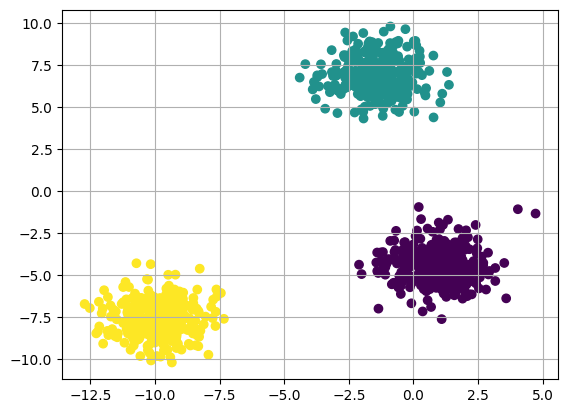

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.grid()

## Три класса 2

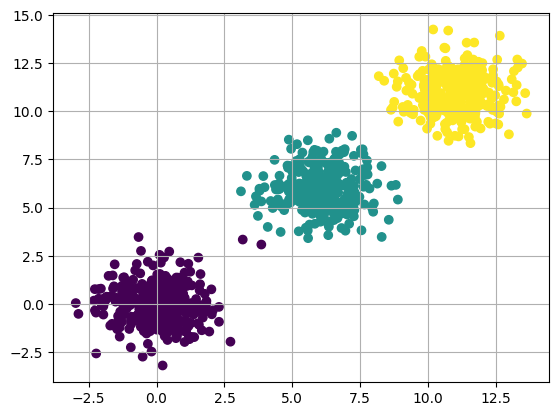

In [10]:
X, y = make_blobs(n_samples=n_samples, centers=[(0, 0), (6, 6), (11, 11)], n_features=n_features, random_state=100)
X = np.column_stack((X, np.ones(n_samples)))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

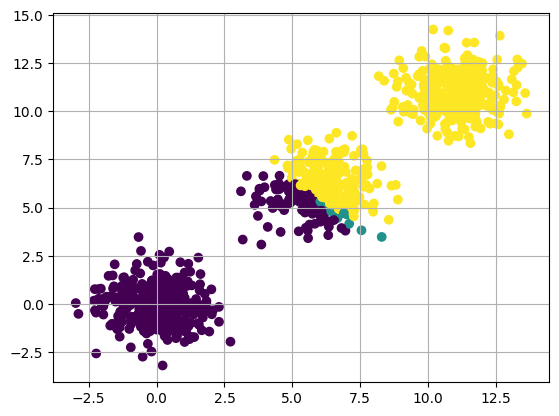

In [11]:
T = one_hot(y)
w = np.linalg.inv(X.T @ X) @ X.T @ T

y_pred = X @ w
y_pred = y_pred.argmax(axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.grid()

## Два класса

In [12]:
n_samples = 1000
n_classes = 2
n_features = 2

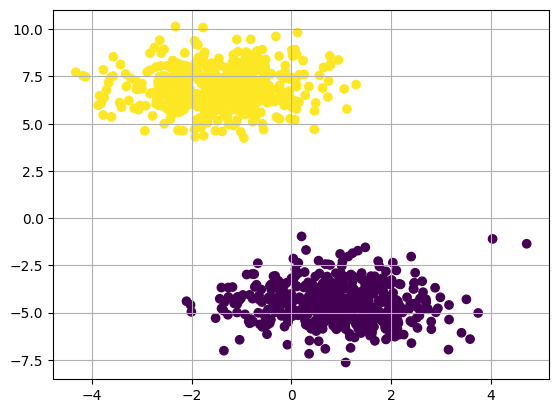

In [13]:
X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=100)
X = np.column_stack((X, np.ones(n_samples)))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

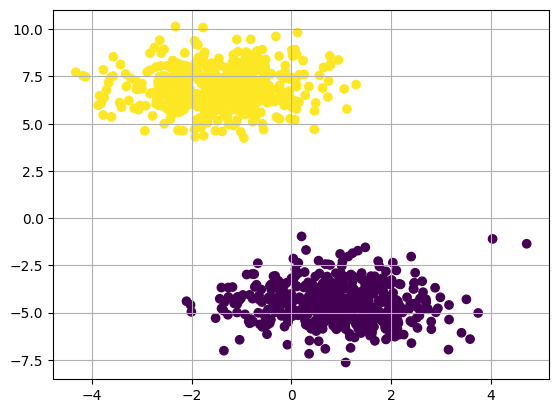

In [14]:
T = one_hot(y)
w = np.linalg.inv(X.T @ X) @ X.T @ T

y_pred = X @ w
y_pred = y_pred.argmax(axis=1)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.grid()

In [15]:
print(X[-1, :])
print(y[-1])

[ 1.90101688 -6.42243454  1.        ]
0


In [16]:
outliers = [[4, -100, 1],
            [4.1, -100, 1],
            [4.2, -100, 1]]

X_new = np.vstack([X, outliers])
y_new = np.append(y, np.zeros(len(outliers)))

print(X_new.shape, y_new.shape)

(1003, 3) (1003,)


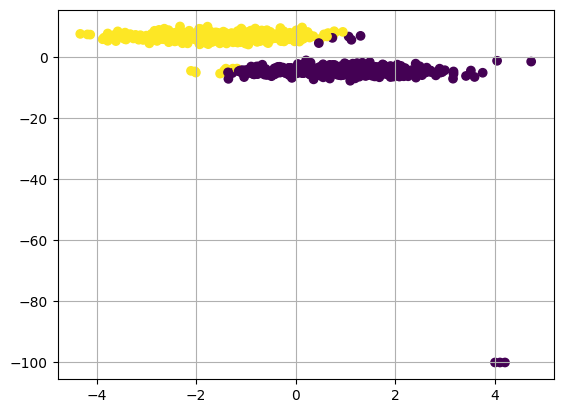

In [17]:
T = one_hot(y_new)
w = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ T

y_pred = X_new @ w
y_pred = y_pred.argmax(axis=1)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred)
plt.grid()

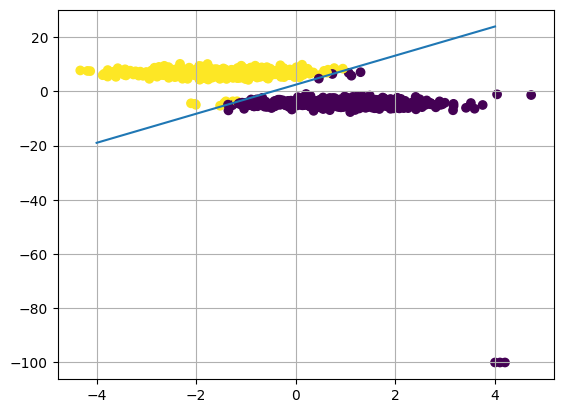

In [18]:
A = w[:, 0] - w[:, 1]

a0 = A[0]
a1 = A[1]
a2 = A[2]

x0 = np.linspace(-4, 4, 100)

x1 = (a0 * x0 + a2) / -a1

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred)
plt.grid()

plt.plot(x0, x1)

# SVM, Logistic regression, LDA

In [19]:
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Задание. Получите оценки качества и постройте разбиение на области для svm с разными ядрами, логистической регрессии и линейного дискриминаннтного анализа

# LDA для сокращения размерности

In [46]:
iris.data.shape

(150, 4)

In [47]:
X = iris.data

In [48]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

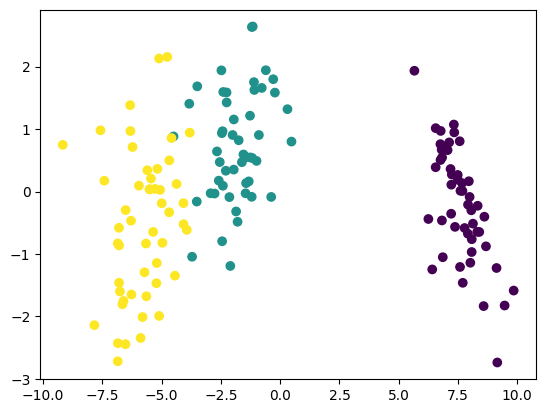

In [49]:
plt.scatter(*X_r2.T, c=y)